In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
import random

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [71]:
adv = pd.read_csv('./Advertising.csv')
adv

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [72]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Выводы: 
1) Пропусков в данных нет
2) Есть ненужный столбец 'Unnamed: 0'

In [73]:
# Удалим ненужный столбец 'Unnamed: 0'
adv = adv.drop('Unnamed: 0', axis=1)
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [74]:
# Массив предикторов
X = adv[['TV', 'radio', 'newspaper']].values
# Целевая переменная
y = adv['sales'].values
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [75]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [76]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))    

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [77]:
num_iters = 1000
m = len(X)
n = len(X[1,:])
w = np.array([0, 0, 0, 0])
w = np.reshape(w, (n, 1))


for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-го фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-коэффициента        
        w[k] = (X[:,k].T @ (y-h))
        # вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2) / len(y)
        
display('Вектор параметров w = {}'.format([x[0] for x in w]))


'Вектор параметров w = [43, 110, 71, 0]'

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [78]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [79]:
X = adv[['TV', 'radio', 'newspaper']].values
X = (X - X.mean()) / X.std()

**Добавим единичный столбец**

In [80]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [81]:
def mse_error(y, y_pred):
    difference = y - y_pred
    squared_defference = np.square(difference)
    return np.mean(squared_defference)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [82]:
# Вычисляем MSE для наивного прогноза, т. е. выборочную дисперсию
y_mean = y.mean()  
MSE = sum([1/len(y)*(y_value[0] - y_mean)**2 for y_value in y])
print('MSE for the naive prediction: {}'.format(MSE))


MSE for the naive prediction: 27.08574374999999


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [83]:
def lin_pred(X, w):
    return X @ w.T

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [84]:
def stoch_grad_step(X, y, w, train_ind, eta):
    return w - 2*eta/len(y) * (X[train_ind,:] * (lin_pred(X[train_ind, :], w) - y[train_ind]))

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [85]:
from sklearn.metrics import mean_squared_error
def stochastic_gradient_descent(X, y, w, eta=0.001, max_iters=10000, min_dist=0.001):
    
    dist = 10**10
    mse_errors= []
    iter = 0
    w0 = w
    
    while (dist > min_dist and iter <= max_iters):
        rand_num = random.randint(0, len(y) - 1)
        w1 = stoch_grad_step(X, y, w0, train_ind=rand_num, eta=eta)
        dist = np.linalg.norm(w1-w0)
        w0 = w1
        y_pred = lin_pred(X, w1)
        mse_errors.append(mse_error(y, y_pred))
        iter += 1
    return w1, mse_errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

<AxesSubplot: xlabel='iter_num', ylabel='MSE'>

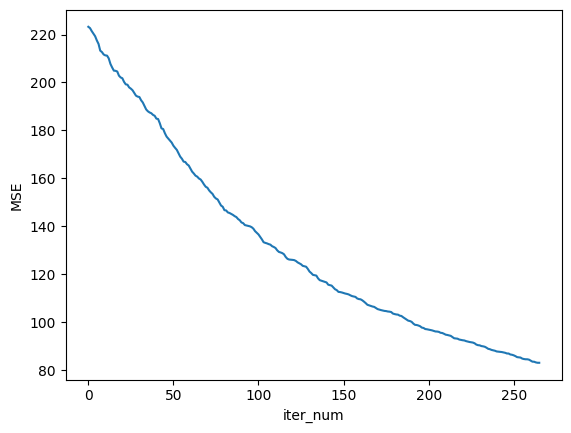

In [86]:
w = np.array([0, 0, 0, 0])
w, mse_errors = stochastic_gradient_descent(X, y, w, max_iters=10**5, eta=0.1, min_dist=0.001)



df = pd.DataFrame(
    data=mse_errors,
    columns=['MSE'])



df['iter_num'] = df.index
#display(df)

sns.lineplot(data=df, x='iter_num', y='MSE')


**Выведите вектор весов, к которому сошелся метод.**

In [87]:
print("Vector of model's weights: w = {}".format(w))

Vector of model's weights: w = [ 2.66818836  3.55473343 -1.33863703 -1.14141498]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [88]:
print('Last MSE error: {}'.format(mse_errors[-1]))

Last MSE error: 83.00840915893967
